<a href="https://colab.research.google.com/github/KumudaBG/CMPE-297-Special-Topics-Assignments/blob/main/Assignment4/nlp_task_autoviml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install deep_autoviml

     |████████████████████████████████| 269 kB 7.6 MB/s 
     |████████████████████████████████| 4.4 MB 57.3 MB/s 
     |████████████████████████████████| 14.5 MB 31 kB/s 
     |████████████████████████████████| 308 kB 66.0 MB/s 
     |████████████████████████████████| 170 kB 64.7 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 209 kB 52.4 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 111 kB 64.8 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 144 kB 50.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=78e6bdc90c940c0c245b20abb90be3e244da7adb25dbb2a39953378ca35094e6
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8.2-

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import optua 
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise 
from storm_tuner import Tuner 
from tensorflow import keras
import json
import io,os

In [ ]:
BATCHSIZE = 256
#CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
#Import kaggle data
kaggle_json = {"username":"kumudabg","key":"1134be2d95490124194bf94fac598ce7"}

os.makedirs('/content/.kaggle/',exist_ok=True)

os.makedirs('/root/.kaggle/',exist_ok=True)

with open('/content/.kaggle/kaggle.json', w') as file:
  json.dump(kaggle_json, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

100% 4.38M/4.38M [00:00<00:00, 40.8MB/s]



In [ ]:
! unzip /content/covid-19-nlp-text-classification.zip

Archive:  /content/covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [ ]:
data=pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin1')
data.head(1)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral


In [ ]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = '/content/Corona_NLP_train.csv'
testfile='/content/Corona_NLP_test.csv'
target='Sentiment'

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
Loaded a small data sample of size = (10000, 6) into pandas dataframe to analyze...
    Classify

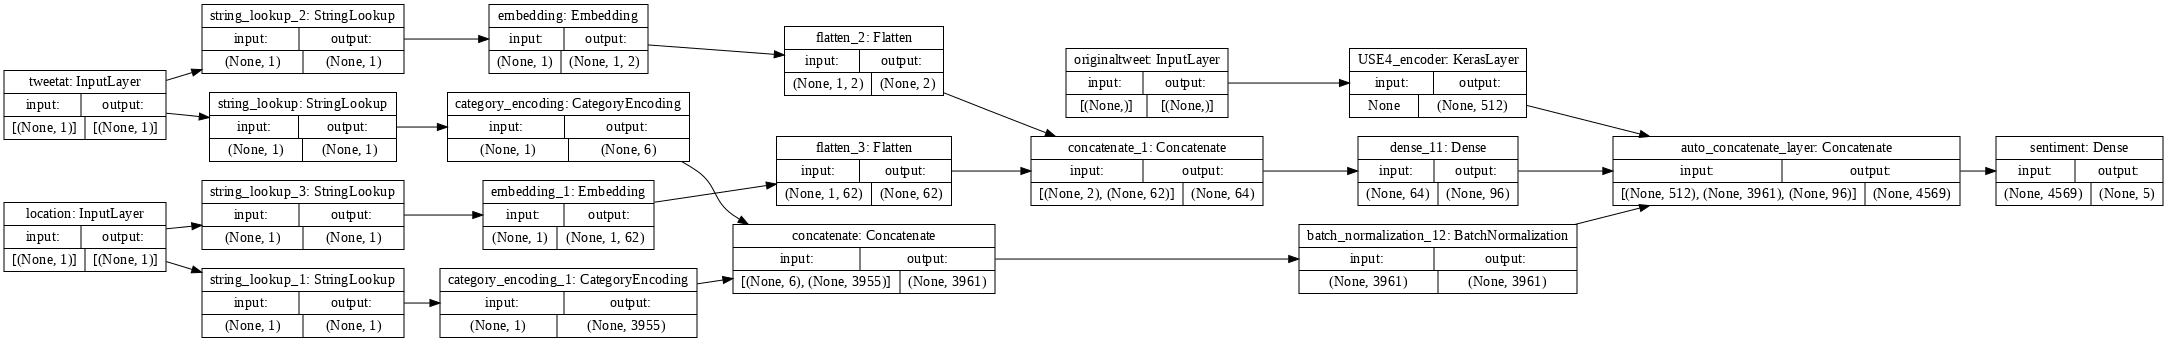

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.273074474856779, 1: 1.3679890560875514, 2: 1.0, 3: 1.1305822498586773, 4: 1.0}
    original datasize = 10000, initial batchsize = 32
    recommended steps per epoch = 156
    recommended OneCycle steps = 109550
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 350, steps per epoch = 15

Splitting train into 80+20 percent: trai

KeyboardInterrupt: ignored

In [ ]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [ ]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)

In [ ]:
test = pd.read_csv(testfile)
print("First five predicted labels: ",predictions[1][:5])
print("First five actual labels: ",test[target].values[:5])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

In [ ]:
logdir = 'deep_autoviml\mylogs' 
## Load the TensorBoard notebook extension 
%load_ext tensorboard %tensorboard --logdir=logdir